# Credit Card Fraud Detection
##### Credit Card Fraud Detection is a classic example of class imabalace. Such datasets have a relatively low number of instances of main class of interest and therefore pose a challenge for data analysis and modelling. 
##### If not dealt properly, results on such datasets can be misleading often prone to overfitting and wrong correlations. There are certain techniques and trick to be used while dealing with class imbalanced data. 
##### In this notebook, we shall analyze the dataset and train machine learning models so that we can get accurate results on such a dataset.

## Table of Content
* [Data Exploration](#exploration)
* [Class Imbalanced Data, Oversampling and Undersampling](#cib)
* [Splitting](#splitting)
* [Outlier Removal](#outlier)
* [Normalization and Tranformation](#nt)
* [PCA and t-SNE](#pcts)
    * [PCA](#pca)
    * [t-SNE](#tsne)


<br><br>
**Please hit upvote if you find the notebook useful.**
<br><br>
**Note:- I have completed the analysis part, modelling part will be implemented soon.**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../input/creditcardfraud/creditcard.csv')
print(data.shape)
data.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

**Inferences after first look on data**<br>
* **V1-V28** - Unknown normalized attributes. (Numeric, Continuous)
* **Time** - Does not represent actual date. (Ordinal)
* **Amount** - Amount of transaction performed. (Numeric, Continuous)
* **Class** - Represents Fraud/Non-Fraud. (Categorical/Nominal)

<a id="exploration"></a>
### Data Exploration

First thing to look upon is **class distribution** because Fraud Data is mostly imbalanced which supports the fact that Fraud Transaction are rare. Next, Amount should be investigated then we shall look upon Time.

0    284315
1       492
Name: Class, dtype: int64


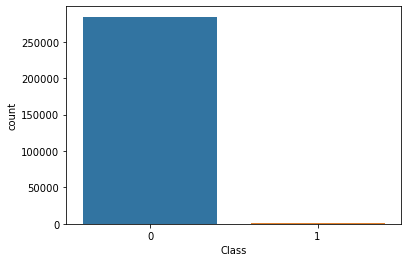

In [4]:
# Class count
print(data['Class'].value_counts())
sns.countplot(data=data, x='Class')

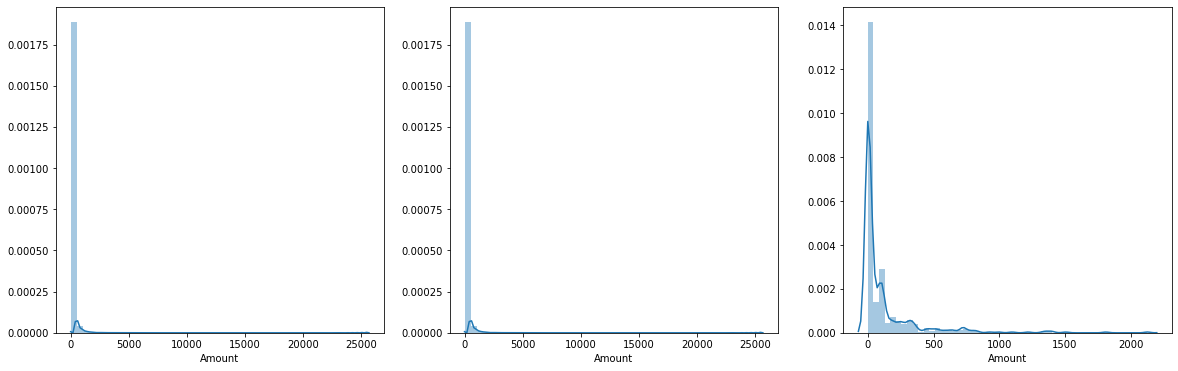

In [5]:
# Distribution of Amount
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
sns.distplot(data['Amount'], ax=ax1)
sns.distplot((data[data['Class']==0])['Amount'], ax=ax2)
sns.distplot((data[data['Class']==1])['Amount'], ax=ax3)

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
2088.0       1
64100.0      1
42068.0      1
119630.0     1
140344.0     1
Name: Time, Length: 124592, dtype: int64


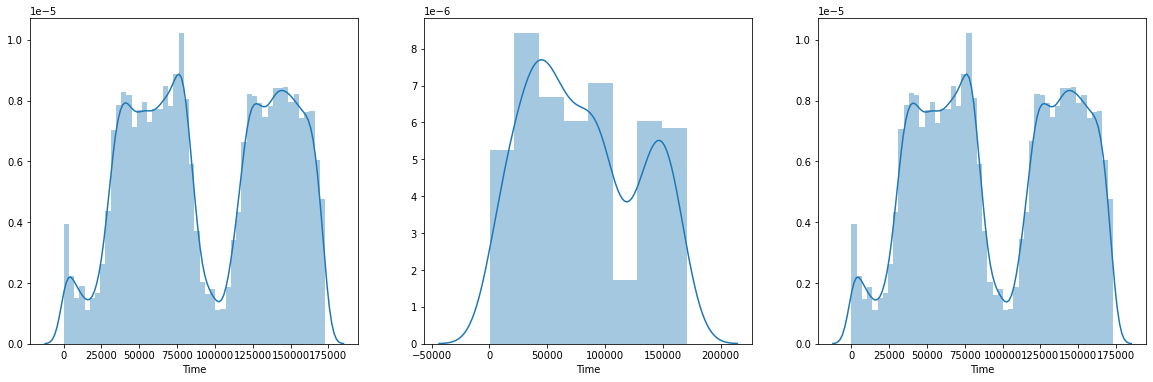

In [6]:
# Investigating time
print(data['Time'].value_counts())
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
sns.distplot(data['Time'],ax=ax1)
sns.distplot(data[data['Class']==1]['Time'],ax=ax2)
sns.distplot(data[data['Class']==0]['Time'],ax=ax3)

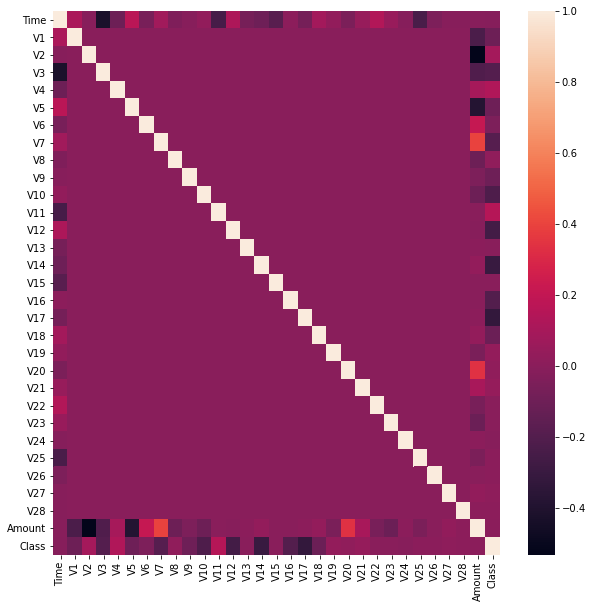

In [7]:
# Other variables are normalized so let's plot correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(data.corr())

**Inferences from so far analysis**
* Class distribution is highly imbalanced.
* 0 - Non Fraud, 1 - Fraud (only 492 instances)
* Amount distributions are highly skewed and most transaction amounts are low.
* Time does not convey much but 100000 is particularly low
* Correlation heatmap on full dataset conveys less but still v2-Amount are negatively correlated while v7-Amount and v20-Amount show some positive correlation.

<a id="cib"></a>
### Class Imbalanced Data, Oversampling and Undersampling
* When the distribution of classes is such that a class or classes is found in smaller number as compared to other class(es), data is said to be class imbalanced data. The rare class is often the class of importance.
* Class imbalanced data therefore needs to be dealt carefully taking careful measures to handle imbalance.
* Accuracy as a measure of performance can not be used to access the classifier in case of class imbalanced data.

#### Oversampling
To deal with class imbalance, the tuples of minority classes can be duplicated or synthetically generated tuples can be added so that the distribution of classes becomes similar. This is called oversampling.<br>
There are a number of ways to perform oversampling, e.g. random duplication of minority tuples, SMOTE, etc.

#### Undersampling
Undersampling refers to deletion of minority tuples to obtain the balanced class distribution. There are a number of ways to perform undersampling, e.g. Random undersampling, NearMiss, etc.
<br><br>
Oversampling and undersampling can also be combined.

To analyse the data, I shall take out random tuples equal to number of minority tuples so that class distribution becomes balanced.

### Undersampling

In [8]:
def choseRandom(d, c):
    """d is the original dataframe and c is the column name denoting variable to be predicted(class)"""
    values = d[c].unique()
    lst =[]
    for i in values:
        lst.append(d[d[c]==i][c].count())
    min_count = min(lst)
    df = pd.DataFrame()
    for i in values:
        df = df.append(d[d[c]==i].sample(n=min_count))
        
    return df

In [9]:
sampled_random = choseRandom(data,'Class')
print(sampled_random.shape)
sampled_random.head()

(984, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
262978,160741.0,2.152112,-1.808883,-0.225555,-1.732980,-1.624458,0.478847,-1.927364,0.243018,-0.852999,...,-0.058592,0.196307,0.274731,0.248983,-0.529343,-0.260318,0.048355,-0.029399,55.94,0
275624,166640.0,1.729496,-1.523605,-0.333122,0.169843,-1.482703,-0.256968,-0.768159,-0.002858,0.752574,...,-0.634966,-1.417745,0.324923,-0.101139,-0.556324,-0.664180,0.039313,-0.001454,177.87,0
9972,14898.0,-2.134571,-0.928512,0.949470,-1.041381,2.755201,3.132323,-1.747353,1.633115,0.348866,...,0.169054,-0.302423,-0.077731,1.078380,-0.531258,2.742649,-0.268862,-0.237099,9.54,0
30287,35856.0,-1.732591,0.058281,0.804585,1.354342,-0.421821,1.311394,1.474207,0.109054,-0.209457,...,-0.169870,0.584242,0.543011,-0.264731,-0.071302,-0.246693,0.019613,-0.455431,276.09,0
52821,45661.0,-0.829017,1.035355,1.378293,0.875899,0.520190,0.218262,0.241354,-0.859176,-0.198413,...,0.570163,-0.561737,-0.147906,-0.438378,-0.024113,-0.445634,0.100352,0.166175,13.80,0


We have got a dataframe with equal class distribution now. For analyses we can now use this DataFrame.
<br>
Let's begin by class distribution itself.

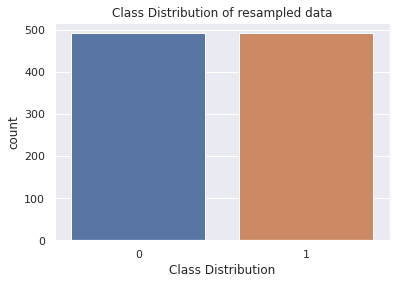

In [10]:
plt.figure(figsize=(6,4))
sns.set(style='darkgrid')
sns.countplot(sampled_random['Class'])
plt.xlabel("Class Distribution")
plt.title('Class Distribution of resampled data')
plt.show()

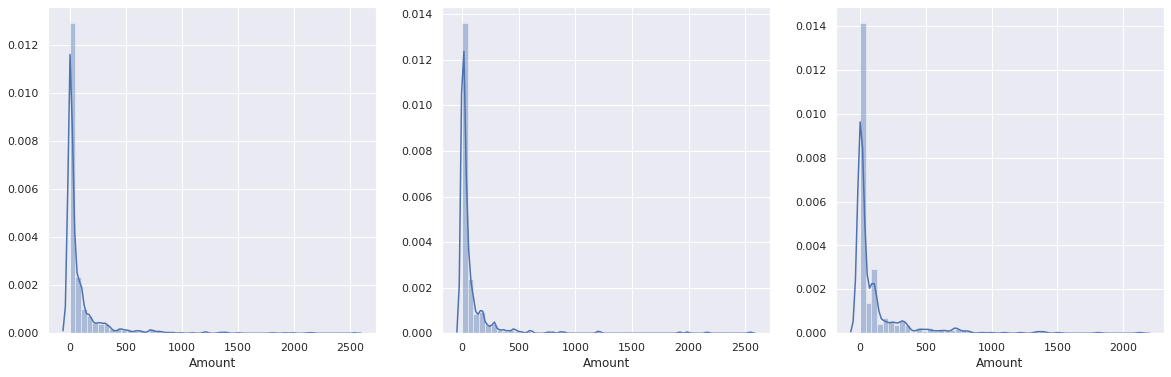

In [11]:
# Plotting distributions of 'Amount'
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
sns.set(style='darkgrid')
sns.distplot(sampled_random['Amount'], ax=ax1)
sns.distplot((sampled_random[sampled_random['Class']==0])['Amount'], ax=ax2)
sns.distplot((sampled_random[sampled_random['Class']==1])['Amount'], ax=ax3)

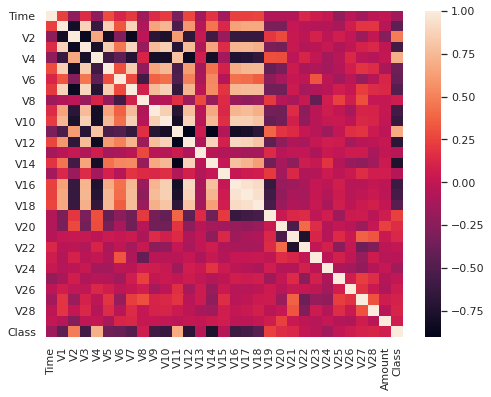

In [12]:
# Heatmap on new sampled data
plt.figure(figsize=(8,6))
sns.heatmap(sampled_random.corr())
plt.show()

**Inferences**
* Amount has to be normalized
* There are certian correlations among attributes which were not apparant.
<br><br>
**To Do:** 
* Outlier Detection
* Normalize
* PCA, t-SNE

Before further proceeding let's split the test and train sets. This is because futher steps include outlier detection and other steps which include changing the data. We do not want to change the test data.

<a id="splitting"></a>
### Splitting into Train and Test data

In [13]:
from sklearn.model_selection import train_test_split
def splitData(d, test_size=0.2):
    train, test = train_test_split(d, stratify = d['Class'], test_size=test_size)
    return train,test

train, test = splitData(data)

<a id="outlier"></a>
### Outlier Removal

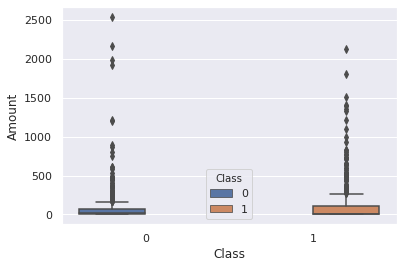

In [14]:
# Let us plot some box plot for Class-vs-Amount
sns.set(style='darkgrid')
sns.boxplot(x = 'Class', y = 'Amount', data = sampled_random, hue='Class')

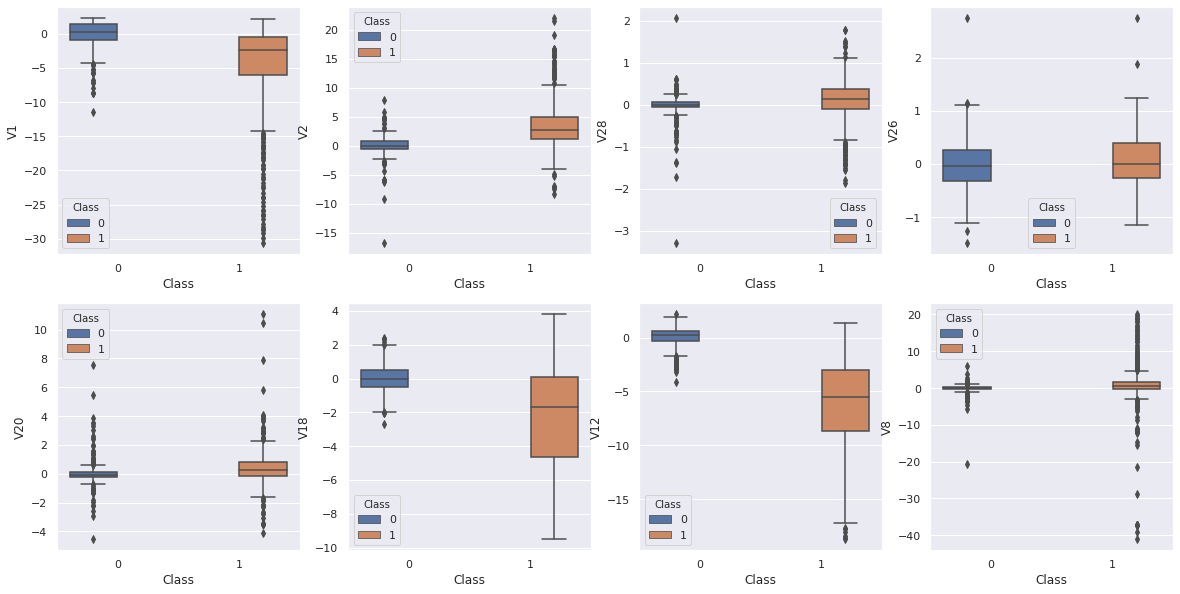

In [15]:
# boxplots for variables V1-V28
plt.figure(figsize=(20,10))
ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)
ax5 = plt.subplot(2,4,5)
ax6 = plt.subplot(2,4,6)
ax7 = plt.subplot(2,4,7)
ax8 = plt.subplot(2,4,8)
sns.set(style='darkgrid')
sns.boxplot(x = 'Class', y = 'V1', data = sampled_random, hue='Class', ax=ax1)
sns.boxplot(x = 'Class', y = 'V2', data = sampled_random, hue='Class', ax=ax2)
sns.boxplot(x = 'Class', y = 'V28', data = sampled_random, hue='Class', ax=ax3)
sns.boxplot(x = 'Class', y = 'V26', data = sampled_random, hue='Class', ax=ax4)
sns.boxplot(x = 'Class', y = 'V20', data = sampled_random, hue='Class', ax=ax5)
sns.boxplot(x = 'Class', y = 'V18', data = sampled_random, hue='Class', ax=ax6)
sns.boxplot(x = 'Class', y = 'V12', data = sampled_random, hue='Class', ax=ax7)
sns.boxplot(x = 'Class', y = 'V8', data = sampled_random, hue='Class', ax=ax8)

On randomly assessing each of the variables from V1-V28 and Amount, it would be obvious to remove outliers outside $1.5*IQR$ and $-1.5*IQR$. 
<br>
$IQR$ stands for Interquartile Range. To know more refer to [here](https://www.kaggle.com/mohtashimnawaz/types-of-data-statistics-and-proximity-measures).

In [16]:
# Cleaning up the outliers 
def cleanOutliers(d, q1, q3, r):
    """d is the data frame, q1 and q3 are quantiles and r is the range above of below quantiles, 
    Generally, q1=0.25, q3=0.75, r=1.5"""
    cols = d.columns
    for i in cols:
        Q1 = d[i].quantile(q1)
        Q3 = d[i].quantile(q3)
        IQR = Q3-Q1
        low = Q1 - r*IQR
        high = Q3 + r*IQR
        d = d[(d[i]>=low) & (d[i]<=high)]
    return d

In [17]:
temp = cleanOutliers(train, 0.25, 0.75, 1.5)
print("Class count for 0.25-0.75 and 1.5 IQR fields",temp['Class'].value_counts())
temp = cleanOutliers(train, 0.2, 0.8, 2.0)
print("Class count for 0.2-0.8 and 2.0 IQR fields",temp['Class'].value_counts())
temp = cleanOutliers(train, 0.1, 0.9, 2.5)
print("Class count for 0.1-0.9 and 2.5 IQR fields",temp['Class'].value_counts())
temp = cleanOutliers(train, 0, 1, 2.5)
print("Class count including all samples",temp['Class'].value_counts())

Class count for 0.25-0.75 and 1.5 IQR fields 0    88102
Name: Class, dtype: int64
Class count for 0.2-0.8 and 2.0 IQR fields 0    172327
Name: Class, dtype: int64
Class count for 0.1-0.9 and 2.5 IQR fields 0    213662
Name: Class, dtype: int64
Class count including all samples 0    227451
1       394
Name: Class, dtype: int64


**Inference:**
The above analysis shows that frauds transactions are actually present as outliers which is justified.<br>
So we can not remove outliers from our data.
<br>
Considering all features to remove outliers is not a good decision as analysis shows all the positive class (Class 1) tuples are removed.
<br>
Also, since fraud transactions may actually be outliers, we will **not remove outliers** for now.

<a id="nt"></a>
### Normalizations and Transformations
As the 'Amount' is highly skewed, we will apply log transform on it to get the normal distribution.
<br><br>
So we would have to normalize the 'Amount' attribute. For now, I shall use MinMaxScaler which transform data to a given range. Although, Robust Scaler is robust to outliers, it produces negative quantities too, which for Amount of transactions is not desirable as it can not be negative. 

In [18]:
def logTransform(d,col):
    d[col] = np.log1p(d[col])
    return d
def invLog(d, col):
    d[col] = np.expm1(d[col])
    return d[col]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


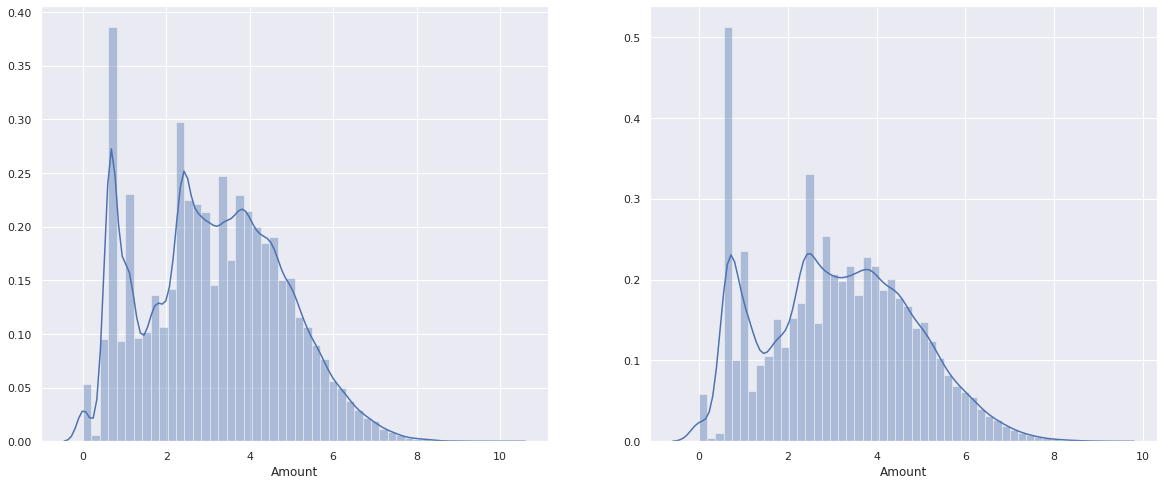

In [19]:
train = logTransform(train, 'Amount')
test = logTransform(test, 'Amount')
plt.figure(figsize=(20,8))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
sns.distplot(train['Amount'], ax=ax1)
sns.distplot(test['Amount'],ax=ax2)
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
def getScaleDataParams(d, col):
    trans = StandardScaler().fit(d[[col]])
    return trans
def scaleData(d, col, param):
    d[[col]] = param.transform(d[[col]])
    return d
def scaleDF(d):
    """Pass a dataFrame to scale all columns, provided that all the columns are numeric"""
    cols = d.columns
    for i in cols:
        params = getScaleDataParams(d,i)
        d = scaleData(d, i, params)
    return d

In [21]:
train.iloc[:,:-1] = scaleDF(train.iloc[:,:-1])
test.iloc[:,:-1] = scaleDF(test.iloc[:,:-1])
train.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
178194,0.603340,1.076441,-0.013801,-1.005084,0.086005,0.409902,-0.252925,0.152651,-0.210460,0.386498,...,-0.446664,-1.119833,0.428422,0.094958,-0.281759,0.423741,-0.178500,-0.173999,-0.572260,0
176887,0.591422,1.006788,-0.237912,-0.504782,-0.112654,-0.568762,-1.258702,0.063729,-0.378828,0.926304,...,0.182437,0.983653,0.237722,1.772034,-0.117384,1.945748,-0.207902,-0.180340,0.126139,0
184761,0.663519,-0.382964,0.006850,1.067128,-1.996556,-0.245998,0.044819,0.204675,-0.768472,2.860773,...,0.419111,1.728674,-0.352545,-0.637879,-1.601450,-1.015971,-4.781804,-2.310876,-0.544923,0
26590,-1.278304,0.544419,-0.034011,0.690355,1.045536,-0.417807,0.364741,-0.383754,0.248767,0.527742,...,-0.028626,0.402118,-0.090799,0.411511,1.077173,-0.596603,0.175213,0.042909,-0.944115,0
159320,0.369280,1.035872,-0.020670,-0.915537,0.054314,0.197499,-0.466505,0.081981,-0.153875,0.368535,...,0.444070,1.486245,0.003459,1.325708,0.637320,-0.990475,0.006874,-0.168082,-1.485280,0


<a id="pcts"></a>
### PCA and t-SNE
* **PCA** stands for Principal Component Analysis and is widely used for dimensionality reduction and to visualize high dimensional data by reducing it into lower dimensions.
* **t-SNE** is a non-linear probabilistic dimensionality reduction algorithm. It cluters the similar points together and dissimilar points farther in lowe dimensional space. 
* t-SNE is more computationally expensive than PCA.

<a id="pca"></a>
### PCA

In [22]:
# Undersampling on training data
random_train = choseRandom(train,'Class')
print(random_train.shape)
random_train.head()

(788, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
247610,1.237426,1.088985,-0.877842,-0.143464,-0.678862,-0.758741,0.931096,-1.522795,0.441594,0.909173,...,0.143735,0.702285,0.253351,-0.592105,-0.517400,-0.351733,0.117849,-0.164966,-1.240412,0
92682,-0.648956,-0.468721,0.392314,1.111017,-0.293394,-0.086080,-0.167862,0.440840,0.181249,0.405122,...,-0.326419,-0.804337,-0.003112,0.067587,-0.369906,0.339477,0.423592,0.502745,0.148955,0
209547,0.900064,0.944072,-0.235633,-1.504691,0.064613,0.503661,0.054874,0.045810,0.015170,0.806307,...,-0.286432,-0.934553,-0.021745,-0.786879,0.024859,-0.177278,-0.101907,-0.052545,0.983740,0
205936,0.865827,-0.329404,0.590362,-0.126063,-0.387795,-0.323792,-0.006736,-0.358771,0.654019,0.204604,...,0.539340,1.392498,0.072185,0.944201,-1.248517,0.907102,-1.056695,-0.238901,0.136935,0
215372,0.951210,0.135130,0.578216,-0.178342,-0.387437,0.882177,-0.650696,1.101078,-0.386753,0.121043,...,-0.457606,-0.939379,-0.187129,-1.308197,-0.553894,-1.343116,-0.213055,-0.474520,-0.456299,0


In [23]:
# PCA
from sklearn.decomposition import PCA
def getFullPCAData(d):
    pca = PCA()
    pca_data = pca.fit_transform(d)
    return pca_data, pca.explained_variance_ratio_*100

def getPCAData(d, n_components=2):
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(d)
    return pca_data, pca.explained_variance_ratio_*100

In [24]:
def plotPCAVariations(pca_data,var):
    per_var = np.round(var, decimals=1)
    labels = ["PC"+str(x) for x in range(1,len(per_var)+1)]
    plt.figure(figsize=(20,6))
    plt.bar(x = range(1,len(per_var)+1), height = per_var, tick_label = labels)
    plt.show()

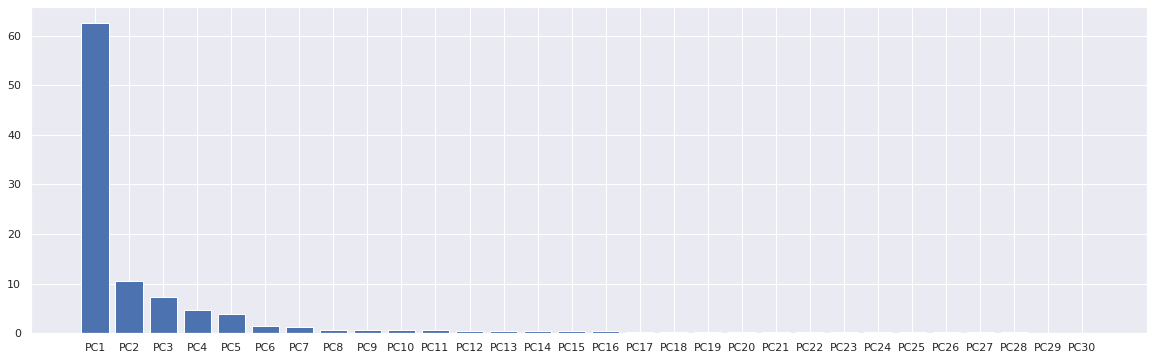

In [25]:
pca_data, var = getFullPCAData(random_train.iloc[:,:-1])
plotPCAVariations(pca_data,var)

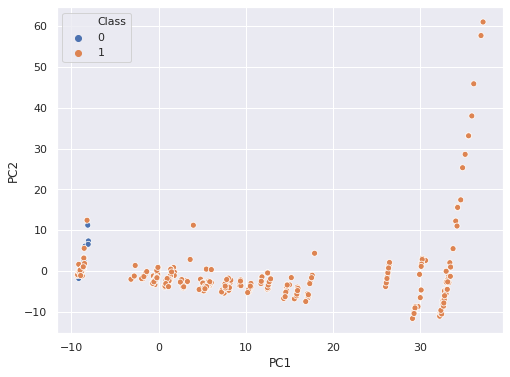

In [26]:
def plotPCAData(d, mask):
    """Plots PCA Data considering n_components = 2"""
    pca_2c, var = getPCAData(d,2)
    pca_df = pd.DataFrame(pca_2c, columns=['PC1','PC2'])
    pca_df['Class'] = mask.values
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='PC1', y='PC2',hue='Class',data = pca_df)
    plt.show()
    return pca_df
    
mask = random_train.iloc[:,-1]
pca_df = plotPCAData(random_train.iloc[:,:-1], mask)

##### Inferences from PCA -
* Most of the information is contained in first Principal Component
* Taking PC1-PC5 prevent much loss of data, however, some information is still lost.
* Taking 2 PCs and plotting a scatter plot, we see that data is mixed, there is not a clear boundary. Thus linear algorithms on 2 PCs won't work well.

<a id="tsne"></a>
### t-SNE

In [27]:
from sklearn.manifold import TSNE
def getTSNE(d):
    tsne = TSNE()
    d_emb = tsne.fit_transform(d)
    return d_emb

In [28]:
d_emb = getTSNE(random_train.iloc[:,:-1])

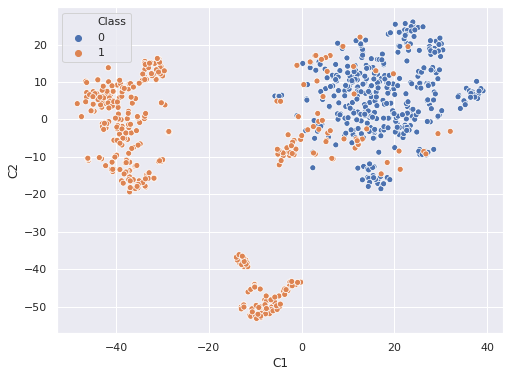

In [29]:
def plotTSNEData(d, mask):
    """Plots PCA Data considering n_components = 2"""
    d_emb = getTSNE(d)
    tsne_df = pd.DataFrame(d_emb, columns=['C1','C2'])
    tsne_df['Class'] = mask.values
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='C1', y='C2',hue='Class',data = tsne_df)
    plt.show()
    return tsne_df
    
mask = random_train.iloc[:,-1]
tsne_df = plotTSNEData(random_train.iloc[:,:-1], mask)

**Inferences from t-SNE:**
* t-SNE provided much better results than PCA
* t-SNE shows that data is rather well classified even for 2 components.
* Classifiers can work well when applied properly.

## Models Using Random Undersampling
Next, we shall try models. There are two ways to go, either undersampling or oversampling. I shall try both starting with random undersampling.<br><br>
**Note:-** While using CrossValidation it is important to note that data should be sampled inside cross-validation otherwise it will cause data leak.
<br><br>
I will implement the modelling part soon.